In [1]:
from os.path import join, basename, splitext
from glob import glob
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler


from deep_aqi import ROOT

pd.set_option('expand_frame_repr', False)
plt.style.use('ggplot')

In [2]:
def MAPE(data):
    data = data[data['True'] > 0]
    return np.mean(np.abs(data['True'] - data.Pred) / data['True'])

def MdAPE(data):
    data = data[data['True'] > 0]
    return np.median(np.abs(data['True'] - data.Pred) / data['True'])

In [3]:
def calc_results(Y):
    y_test, y_pred = Y['True'], Y['Pred']
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = MAPE(Y)
    mdape = MdAPE(Y)
    
    return {'MAE': mae, 'MSE': mse, 'MAPE': mape, 'MdAPE': mdape}

In [4]:
RESULT_DATA = join(ROOT, 'jupyter', 'results')
PLOT_DIR = join(ROOT, 'jupyter', 'plots')

# Results analysis

In [5]:
# file_path = join(PROCESSED_DATA, '88101.parquet') # PM2.5 FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '88502.parquet') # PM2.5 non FRM/FEM Mass
# file_path = join(PROCESSED_DATA, '81102.parquet') # PM10 Mass
# file_path = join(PROCESSED_DATA, '44201.parquet') # Ozone
# file_path = join(PROCESSED_DATA, '42401.parquet') # SO2
# file_path = join(PROCESSED_DATA, '42101.parquet') # CO
# file_path = join(PROCESSED_DATA, '42602.parquet') # NO2

In [45]:
parameter_name = 42602

In [46]:
best_sites = {88101: 'Vermont_Rutland_2.0',
              88502: 'Virginia_Madison_3.0',
              81102: 'Wyoming_Sweetwater_200.0',
              44201: 'Wyoming_Fremont_99.0',
              42401: 'Nevada_Clark_540.0',
              42101: 'Louisiana_East Baton Rouge_9.0',
              42602: 'Maryland_Garrett_2.0',}

best_site = best_sites[parameter_name]

In [8]:
# file_name = f'gradient_boosting_random__{parameter_name}__Results__'
# file_path = join(ROOT, 'jupyter', 'results', file_name)

# with open(file_path, 'rb') as f:
#     results = pickle.Unpickler(f).load() 

In [9]:
# results_ = results.sort_values('MAPE').loc[:, ['MAE', 'MSE', 'MAPE', 'MdAPE']]
# results_ = results_.iloc[[0, 1, 2, -3, -2, -1], :]

# results_.MAPE = (results_.MAPE * 100).round(2).astype(str).apply(lambda x: x + '%')
# results_.MdAPE = (results_.MdAPE * 100).round(2).astype(str).apply(lambda x: x + '%')

# print(results_)

In [10]:
# print(results_.to_latex())

In [11]:
# rcParams["figure.figsize"] = (12, 7)
# rcParams["font.size"] = (11)


# def plot_hist(param):
#     return sns.distplot(results[param], kde=True, norm_hist=True)

# # plt.suptitle('Validation metrics distributions', fontsize=20)

# plt.subplot(221).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x))) 
# plot_hist('MAE')
# plt.xlabel("Mean Absolute Error")
# plt.ylabel("Kernel Density Est.")

# plt.subplot(222).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x)))  
# plot_hist('MSE')
# plt.xlabel("Mean Squared Error")
# plt.ylabel("Kernel Density Est.")            
    
# plt.subplot(223).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
# plot_hist('MAPE')
# plt.xlabel("Mean Absolute Percentage Error")
# plt.ylabel("Kernel Density Est.")

# plt.subplot(224).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
# plot_hist('MdAPE')
# plt.xlabel("Median Absolute Percentage Error")
# plt.ylabel("Kernel Density Est.")

# save_path = join(PLOT_DIR, f'metrics_distribution__{parameter_name}.png')
# plt.savefig(save_path, bbox_inches='tight')

In [12]:
# file_name = f'gradient_boosting_random__{parameter_name}__Data__'
# file_path = join(ROOT, 'jupyter', 'results', file_name)

# with open(file_path, 'rb') as f:
#     data = pickle.Unpickler(f).load() 

In [13]:
# naive_vals, naive_tests = [], []
# for key in data.keys():
#     temp = data[key]
    
#     _, _, X_test, y_test, X_test_, y_test_ = temp
#     the_column = [column for column in X_test.columns if '-24h' in column and column not in ['max-24h', 'mean-24h', 'min-24h', 'std-24h', 'sum-24h']][0]

#     y_test = y_test.set_index('LocalDate')
#     X_test = pd.DataFrame(X_test[the_column])
    
#     X_test[the_column] = MinMaxScaler().fit_transform(X_test.values.reshape(-1, 1))

#     naive_val = pd.merge(y_test, X_test, right_index=True, left_index=True)
#     naive_val['SiteCode'] = key
#     naive_vals.append(naive_val)
    
    
    
#     y_test_ = y_test_.set_index('LocalDate')
#     X_test_ = pd.DataFrame(X_test_[the_column])
    
#     X_test_[the_column] = MinMaxScaler().fit_transform(X_test_.values.reshape(-1, 1))

#     naive_test = pd.merge(y_test_, X_test_, right_index=True, left_index=True)   
#     naive_test['SiteCode'] = key

#     naive_tests.append(naive_test)

    
# validation_baseline, test_baseline = pd.concat(naive_vals), pd.concat(naive_tests)

# validation_baseline.rename(columns={the_column: 'Pred'}, inplace=True)
# test_baseline.rename(columns={the_column: 'Pred'}, inplace=True)

In [14]:
# base_results = []

# for site_code, table in validation_baseline.groupby('SiteCode'):
#     mae = mean_absolute_error(table['True'], table.Pred)
#     mse = mean_squared_error(table['True'], table.Pred)
#     mape = MAPE(table)
#     mdape = MdAPE(table)
    
#     result = pd.DataFrame(index = [site_code],
#                           data={'MAE': mae,
#                                 'MSE': mse,
#                                 'MAPE': mape,
#                                 'MdAPE': mdape,
#                                })   
#     base_results.append(result)
# base_results = pd.concat(base_results)

In [15]:
# results_ = base_results.sort_values('MAPE').loc[:, ['MAE', 'MSE', 'MAPE', 'MdAPE']]
# results_ = results_.iloc[[0, 1, 2, -3, -2, -1], :]

# results_.MAPE = (results_.MAPE * 100).round(2).astype(str).apply(lambda x: x + '%')
# results_.MdAPE = (results_.MdAPE * 100).round(2).astype(str).apply(lambda x: x + '%')

# print(results_)

In [16]:
# print(results_.to_latex())

In [17]:
# # rcParams["figure.figsize"] = (12, 7)
# # rcParams["font.size"] = (11)


# def plot_base_hist(param):
#     return sns.distplot(base_results[param])

# # plt.suptitle('Baseline metrics distributions', fontsize=20)

# plt.subplot(221).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x))) 
# plot_base_hist('MAE')
# plt.xlabel("Mean Absolute Error")
# plt.ylabel("Kernel Density Est.")

# plt.subplot(222).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x))) 
# plot_base_hist('MSE')
# plt.xlabel("Mean Squared Error")
# plt.ylabel("Kernel Density Est.")   
            
# plt.subplot(223).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
# plot_base_hist('MAPE')
# plt.xlabel("Mean Absolute Percentage Error")
# plt.ylabel("Kernel Density Est.")

# plt.subplot(224).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
# plot_base_hist('MdAPE')
# plt.xlabel("Median Absolute Percentage Error")
# plt.ylabel("Kernel Density Est.")

# save_path = join(PLOT_DIR, f'BASELINE_metrics_distribution__{parameter_name}.png')
# plt.savefig(save_path, bbox_inches='tight')

In [18]:
# mae = mean_absolute_error(validation_baseline['True'], validation_baseline.Pred)
# mse = mean_squared_error(validation_baseline['True'], validation_baseline.Pred)
# mape = MAPE(validation_baseline)
# mdape = MdAPE(validation_baseline)

# mae, mse, mape, mdape

# Linear model results

In [47]:
file_name = f'linear_model_baseline__{parameter_name}__Results__'
file_path = join(ROOT, 'jupyter', 'results', file_name)

print(file_path)

with open(file_path, 'rb') as f:
    lin_results = pickle.Unpickler(f).load() 

c:\users\filip\desktop\deep_aqi\deep_aqi\jupyter\results\linear_model_baseline__42602__Results__


In [48]:
results_ = lin_results.sort_values('MAPE').loc[:, ['MAE', 'MSE', 'MAPE', 'MdAPE']]
results_ = results_.iloc[[0, 1, 2, -3, -2, -1], :]

results_.MAPE = (results_.MAPE * 100).round(2).astype(str).apply(lambda x: x + '%')
results_.MdAPE = (results_.MdAPE * 100).round(2).astype(str).apply(lambda x: x + '%')

print(results_)

                              MAE       MSE     MAPE   MdAPE
Maryland_Garrett_2.0     0.034351  0.002704   34.89%  25.29%
Missouri_Jackson_42.0    0.065721  0.009674   35.93%  23.68%
Michigan_Wayne_94.0      0.061883  0.008968   37.99%  25.49%
Colorado_Rio Blanco_6.0  0.050238  0.005936  159.87%  69.77%
Nevada_Clark_75.0        0.100628  0.018847   263.1%  62.76%
Nevada_Clark_2002.0      0.113759  0.020671  651.36%  56.17%


In [49]:
print(results_.to_latex())

\begin{tabular}{lrrll}
\toprule
{} &       MAE &       MSE &     MAPE &   MdAPE \\
\midrule
Maryland\_Garrett\_2.0    &  0.034351 &  0.002704 &   34.89\% &  25.29\% \\
Missouri\_Jackson\_42.0   &  0.065721 &  0.009674 &   35.93\% &  23.68\% \\
Michigan\_Wayne\_94.0     &  0.061883 &  0.008968 &   37.99\% &  25.49\% \\
Colorado\_Rio Blanco\_6.0 &  0.050238 &  0.005936 &  159.87\% &  69.77\% \\
Nevada\_Clark\_75.0       &  0.100628 &  0.018847 &   263.1\% &  62.76\% \\
Nevada\_Clark\_2002.0     &  0.113759 &  0.020671 &  651.36\% &  56.17\% \\
\bottomrule
\end{tabular}



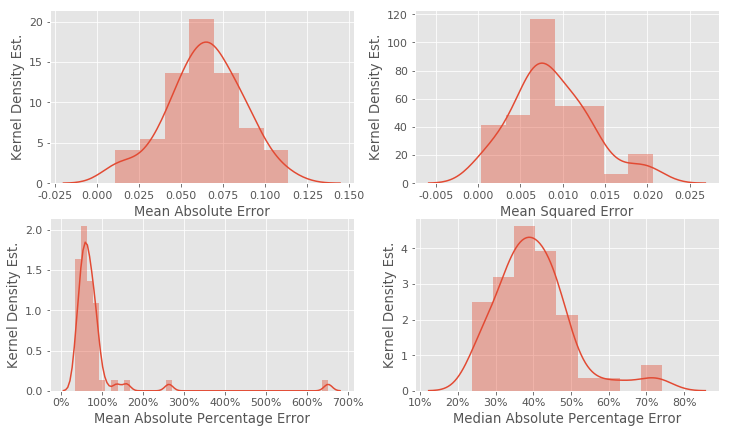

In [50]:
rcParams["figure.figsize"] = (12, 7)
rcParams["font.size"] = (11)


def plot_lin_hist(param):
    return sns.distplot(lin_results[param])

# plt.suptitle('Validation metrics distributions', fontsize=20)

plt.subplot(221).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x))) 
plot_lin_hist('MAE')
plt.xlabel("Mean Absolute Error")
plt.ylabel("Kernel Density Est.")

plt.subplot(222).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.3f}'.format(x))) 
plot_lin_hist('MSE')
plt.xlabel("Mean Squared Error")
plt.ylabel("Kernel Density Est.")   

plt.subplot(223).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
plot_lin_hist('MAPE')
plt.xlabel("Mean Absolute Percentage Error")
plt.ylabel("Kernel Density Est.")

plt.subplot(224).xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
plot_lin_hist('MdAPE')
plt.xlabel("Median Absolute Percentage Error")
plt.ylabel("Kernel Density Est.")

save_path = join(PLOT_DIR, f'lin_model-metrics_distribution__{parameter_name}.png')
plt.savefig(save_path, bbox_inches='tight')



# Test set results

In [38]:
# file_name = f'gradient_boosting_random__{parameter_name}__Predictions10prc__'
# file_path = join(ROOT, 'jupyter', 'results', file_name)

# with open(file_path, 'rb') as f:
#     predictions10prc = pickle.Unpickler(f).load() 


# print(best_site)


# temp = predictions10prc[best_site]

# print(calc_results(temp))

# # rcParams["figure.figsize"] = (12, 7)
# # rcParams["font.size"] = (11)
# rcParams["lines.linewidth"] = 0.5

# # plt.suptitle('Test set results', fontsize=20)

# ax = sns.lineplot(x=temp.index,
#              y=temp['True'],
#              label='True values',
#              color=sns.color_palette("Spectral", 10)[-1])

# ax = sns.lineplot(x=temp.index,
#              y=temp['Pred'],
#              label='Predicted values',
#              color=sns.color_palette("Spectral", 10)[2])

# ax.annotate(f'Number of observations: {len(temp)}',
#             xy=(1, 0),
#             xycoords='axes fraction',
#             fontsize=15,
#             horizontalalignment='right',
#             verticalalignment='bottom')

# ax.figure.autofmt_xdate()

# plt.xlabel("Local Date")
# plt.ylabel("Normalized Pollutant Concentration")

# save_path = join(PLOT_DIR, f'Test-set-lineplot__{parameter_name}.png')
# plt.savefig(save_path, bbox_inches='tight')

# Validation set analysis

In [24]:
# file_name = f'gradient_boosting_random__{parameter_name}__Predictions__'
# file_path = join(ROOT, 'jupyter', 'results', file_name)

# with open(file_path, 'rb') as f:
#     predictions = pickle.Unpickler(f).load() 

# temp = predictions
# temp = predictions[best_site]

# print(calc_results(temp))

# # rcParams["figure.figsize"] = (12, 7)
# # rcParams["font.size"] = (11)
# rcParams["lines.linewidth"] = 0.5


# # plt.suptitle('Validation set results', fontsize=20)

# ax = sns.lineplot(x=temp.index,
#              y=temp['True'],
#              label='True values',
#              color=sns.color_palette("Spectral", 10)[-1])

# ax = sns.lineplot(x=temp.index,
#              y=temp['Pred'],
#              label='Predicted values',
#              color=sns.color_palette("Spectral", 10)[2])

# ax.annotate(f'Number of observations: {len(temp)}',
#             xy=(1, 0),
#             xycoords='axes fraction',
#             fontsize=12,
#             horizontalalignment='right',
#             verticalalignment='bottom')
# ax.figure.autofmt_xdate()

# plt.xlabel("Local Date")
# plt.ylabel("Normalized Pollutant Concentration")

# save_path = join(PLOT_DIR, f'validation-set-lineplot__{parameter_name}.png')
# plt.savefig(save_path, bbox_inches='tight')

